# Support Vector Machines

## Importing the necessary libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support,cohen_kappa_score
from sklearn.model_selection import validation_curve, train_test_split, GridSearchCV
plt.style.use("seaborn")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Reading the train & test data from MNIST dataset

In [ ]:
train_file = pd.read_csv('mnist_train.csv')
test_file = pd.read_csv('mnist_test.csv')


In [ ]:
X = train_file.iloc[:,1:].values
y = train_file.iloc[:,0].values

In [ ]:
test = test_file.iloc[:,1:].values

## Splitting the data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Standardizing the values for SVM

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_test = sc_X.transform(test)

## Training using the SVC with a linear kernel

In [ ]:
classifier = SVC(kernel='linear', random_state=0,verbose = True)
classifier.fit(X_train,y_train)


[LibSVM]

SVC(kernel='linear', random_state=0, verbose=True)

In [ ]:
y_pred = classifier.predict(X_test)



In [ ]:
print("Cohen Kappa score is " + str(cohen_kappa_score(y_test, y_pred)))
print("Accuracy is " + str(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Cohen Kappa score is 0.9138843982185424
Accuracy is 0.9225333333333333
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1510
           1       0.96      0.98      0.97      1728
           2       0.89      0.91      0.90      1458
           3       0.90      0.90      0.90      1548
           4       0.91      0.93      0.92      1434
           5       0.88      0.87      0.88      1342
           6       0.96      0.95      0.95      1468
           7       0.94      0.93      0.93      1535
           8       0.91      0.87      0.89      1484
           9       0.91      0.90      0.91      1493

    accuracy                           0.92     15000
   macro avg       0.92      0.92      0.92     15000
weighted avg       0.92      0.92      0.92     15000



In [ ]:
model_acc = classifier.score(X_test, y_test)
test_acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)


## Printing the confusion matrix


SVM Trained Classifier Accuracy:  0.9225333333333333

Accuracy of Classifier on Validation Images:  0.9225333333333333


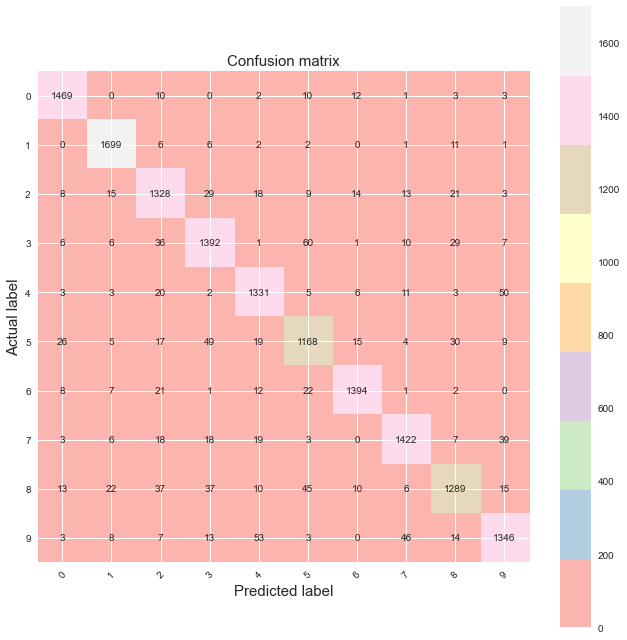

In [ ]:
print('\nSVM Trained Classifier Accuracy: ', model_acc)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')
plt.savefig("SVM - Confusion Matrix")